# 02. Neural Network classification with PyTorch

Classification is a problem of predicting wheather something is one thing or another(there can be multiple things as the options)

## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x,y = make_circles(n_samples=n_samples,
                   noise = 0.03,
                   random_state=42)

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
print(f"First 5 sample of x: {x[:5]}")
print(f"First 5 sample of y:{y[:5]}")

First 5 sample of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y:[1 1 1 1 0]


In [ ]:
# Make Dataframe of circle data
import pandas as pd

circle = pd.DataFrame({
                        "X1":x[:,0],
                        "X2" : x[:,1],
                       "label":y
                      })
circle.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


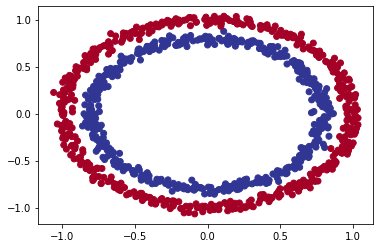

In [ ]:
# Visualize our Data
import matplotlib.pyplot as plt

plt.scatter(x[:,0],
            x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shape

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"Values for one sample of x: {x_sample} and the same for y: {y_sample}")

Values for one sample of x: [0.75424625 0.23148074] and the same for y: 1


### 1.2 Turn data into tensor and create train and test splits

In [ ]:
import torch

In [ ]:
type(x)

numpy.ndarray

In [ ]:
# Turn data into tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(x),x.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
torch.manual_seed(128)

In [ ]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state = 42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agonistic code so our code will run on an accelerator(GPU) if there is one

2. Construct a model (by subclassing `nn.Module`)

3. Define a loss function and optimizer

4. Create a training and test loop 

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [ ]:
# Construct a model that subclasses nn.module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Create nn.Linear layer capable of handling the shape of our data
    # self.layer_1 = nn.Linear(in_features=2,out_features=5)
    # self.layer_2 = nn.Linear(in_features=5,out_features=1)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )

  # define a forward method that outlines the forword pass
  def forward(self,x:torch.Tensor)->torch.Tensor:
    # return self.layer_2(self.layer_1(x))
    return self.two_linear_layers(x)

# Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0()
model_0 

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
# Check the model current device
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight', tensor([[ 0.5078, -0.2024],
                      [-0.1908, -0.6309],
                      [ 0.1988, -0.1725],
                      [ 0.2092,  0.6996],
                      [-0.4743,  0.3034]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([-0.3656, -0.4014, -0.1507, -0.1495,  0.6636], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[0.1807, 0.0721, 0.3816, 0.0659, 0.3290]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([-0.3237], device='cuda:0'))])

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.6941, -0.5808],
                      [ 0.6993, -0.5077],
                      [ 0.3474, -0.2419],
                      [ 0.1972,  0.3089],
                      [-0.4497, -0.1673]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6608, -0.5772, -0.0235, -0.0692,  0.3251], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3269,  0.2372,  0.3310, -0.3467, -0.1112]], device='cuda:0')),
             ('1.bias', tensor([0.0159], device='cuda:0'))])

In [ ]:
# Make prediction
with torch.inference_mode():
  untrained_preds = model_0(x_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples:{len(x_test)}, Shape:{x_test.shape}")
print(f"\nFirst 10 prediction: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples:200, Shape:torch.Size([200, 2])

First 10 prediction: 
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [-0.],
        [0.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use?

Again.. this is problem specific.

For example for regression you might want want MAE or MSE(mean Absolute error or Mean Square Error)

For classification you might want binary cross entropy or categorical cross entropy.

And for optimizer, two of the most common and usefull are SGD and Adam, however Pytorch has many built-in options.

In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what persentage does our model get right?

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train model


To train our model,we're going to need to build a training loop with the following steps:

1. Forword pass

2. calculate the loss

3. Optimizer zero grad

4. Loss backward(backpropagation)

5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forword pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.1762],
        [-0.0126],
        [-0.2377],
        [-0.1604],
        [ 0.3457]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4561],
        [0.4968],
        [0.4409],
        [0.4600],
        [0.5856]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >=0.5,`y=1` (class 1)

* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the prediction labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(128)
# torch.cuda.mannual_seed(128)

# Set the number of epochs
epochs = 100

# Put data to target device
x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

#Build trainig and evaluation loop
for epoch in range(epochs):
  ###Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss excepts prediction probabilisties as input
  #               y_train)

  loss = loss_fn(y_logits,y_train) # nn.BCEwithLogitisLoss expectes raw logits as input
  acc = accuracy_fn(y_true= y_train,y_pred=y_pred)

  # 3. Optimizer zero grade
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5 Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc : {test_acc:.2f}")


Epoch: 0 | Loss: 0.70608, Acc: 50.38% | Test loss: 0.70829, Test acc : 51.50
Epoch: 10 | Loss: 0.70254, Acc: 50.00% | Test loss: 0.70432, Test acc : 52.00
Epoch: 20 | Loss: 0.70013, Acc: 50.38% | Test loss: 0.70159, Test acc : 51.50
Epoch: 30 | Loss: 0.69843, Acc: 50.25% | Test loss: 0.69963, Test acc : 51.00
Epoch: 40 | Loss: 0.69720, Acc: 50.12% | Test loss: 0.69820, Test acc : 51.00
Epoch: 50 | Loss: 0.69629, Acc: 50.12% | Test loss: 0.69713, Test acc : 51.00
Epoch: 60 | Loss: 0.69560, Acc: 50.25% | Test loss: 0.69633, Test acc : 50.50
Epoch: 70 | Loss: 0.69508, Acc: 50.38% | Test loss: 0.69572, Test acc : 50.50
Epoch: 80 | Loss: 0.69468, Acc: 50.38% | Test loss: 0.69525, Test acc : 50.50
Epoch: 90 | Loss: 0.69436, Acc: 50.25% | Test loss: 0.69490, Test acc : 51.00


## 4. Make prediction and evaluate the model

From the metrics it looks like our model isn't learning anything ...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize"

To do so we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo(if it's not alredy downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping dowload")
else:
  print("Download helper_functions.py ")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py 


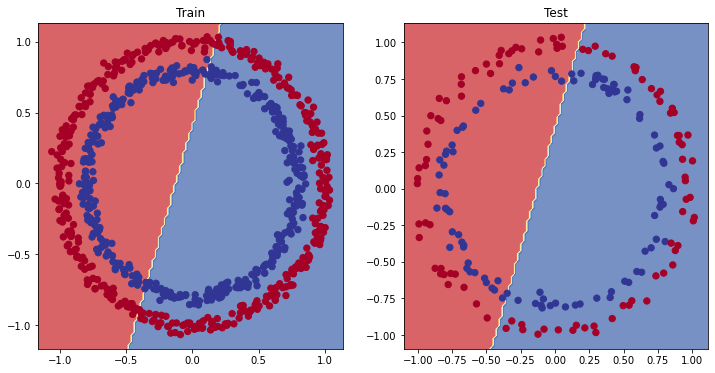

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,x_test,y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer

* Changing the activation functions

* Change the learning rate

* Change the loss function


These option are all from a model perspective because they deal directly with the model,rather then the data.

Let's try and improve our model by:

* Adding more hidden units: 5->10
* Increase the number of layers: 2->3

* Inccrease the number of epochs:100->1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an Optimizer
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 0.01)


In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

for epoch in range(epochs):

  # Training
  model_1.train()

  # 1. Forward pass
  y_logits =model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  
  # 3.Optimizer zero grade
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Foeword pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred=test_pred)
    
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc : {test_acc:.2f}")

Epoch: 0 | Loss: 0.69605, Acc: 50.00% | Test loss: 0.69711, Test acc : 50.00
Epoch: 10 | Loss: 0.69554, Acc: 50.00% | Test loss: 0.69653, Test acc : 50.00
Epoch: 20 | Loss: 0.69512, Acc: 50.00% | Test loss: 0.69606, Test acc : 50.00
Epoch: 30 | Loss: 0.69479, Acc: 50.25% | Test loss: 0.69568, Test acc : 50.00
Epoch: 40 | Loss: 0.69453, Acc: 55.38% | Test loss: 0.69537, Test acc : 52.00
Epoch: 50 | Loss: 0.69432, Acc: 58.38% | Test loss: 0.69512, Test acc : 57.00
Epoch: 60 | Loss: 0.69414, Acc: 58.38% | Test loss: 0.69492, Test acc : 54.50
Epoch: 70 | Loss: 0.69400, Acc: 55.50% | Test loss: 0.69475, Test acc : 55.00
Epoch: 80 | Loss: 0.69389, Acc: 53.62% | Test loss: 0.69462, Test acc : 53.50
Epoch: 90 | Loss: 0.69380, Acc: 52.75% | Test loss: 0.69451, Test acc : 52.50
Epoch: 100 | Loss: 0.69372, Acc: 52.25% | Test loss: 0.69442, Test acc : 53.50
Epoch: 110 | Loss: 0.69366, Acc: 52.38% | Test loss: 0.69434, Test acc : 53.50
Epoch: 120 | Loss: 0.69361, Acc: 52.00% | Test loss: 0.69428, T

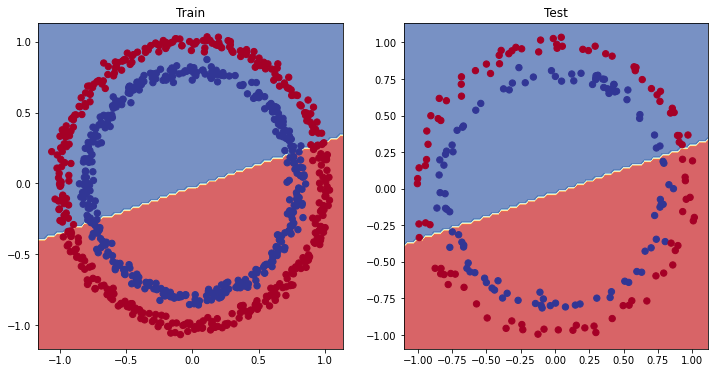

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,x_test,y_test)

## 5. The Missing piece: non-linearity

### 5.1 Recreating non-linear data(red and blue circles)

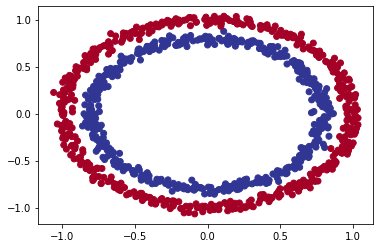

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x,y = make_circles(n_samples=n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(x[:,0],
            x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensor and then to train and test splits
from sklearn.model_selection import train_test_split
import torch
from torch import nn

# Turn data into tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

x_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

In [ ]:
# Building a model with non-linear activation functions
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an Optimizer
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr = 0.1)


### 5.3 Training a model with non-linearity

In [ ]:
# Write a training and evaluation loop for model_2
torch.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

for epoch in range(epochs):

  # Training
  model_2.train()

  # 1. Forward pass
  y_logits =model_2(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  
  # 3.Optimizer zero grade
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Foeword pass
    test_logits = model_2(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred=test_pred)
    
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc : {test_acc:.2f}")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc : 50.00
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc : 52.50
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc : 55.00
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc : 56.00
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc : 56.50
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc : 56.50
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc : 56.00
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc : 59.00
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc : 67.50
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc : 79.00


### 5.4 Evaluating a model trained with non-Linear activation functions

In [ ]:
# Make prediction
model_2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_2(x_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

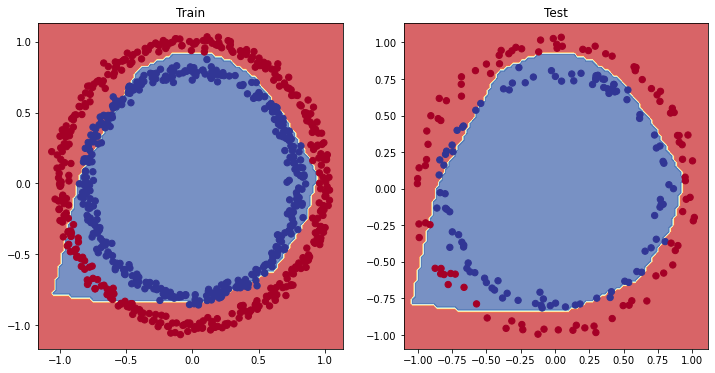

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,x_test,y_test)

## 6. Replicating non-linear activation functions

Neural network, rather then us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tool are linear and nonlinear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

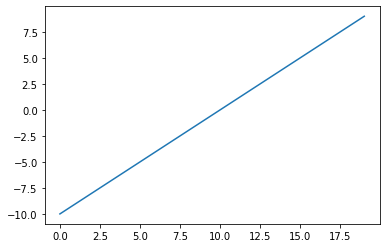

In [ ]:
# Visualize the data
plt.plot(A)

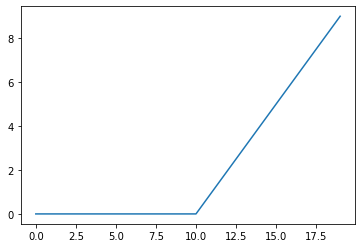

In [ ]:
plt.plot(torch.relu(A))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


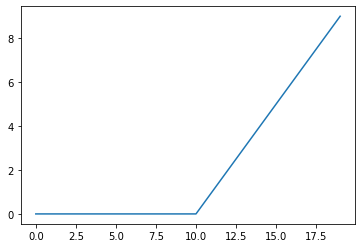

In [ ]:
def relu(x:torch.Tensor):
  return torch.max(torch.tensor(0),x)

print(relu(A))
plt.plot(relu(A))

In [ ]:
# Now let's do the same for sigmoid
def sigmoid(x:torch.Tensor):
  return 1/(1+torch.exp(-x))


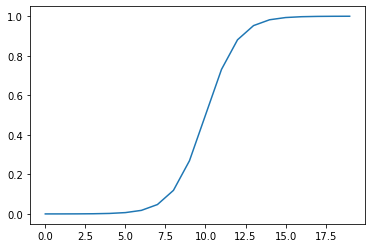

In [ ]:
# PyTorch inbuilt function
plt.plot(torch.sigmoid(A))

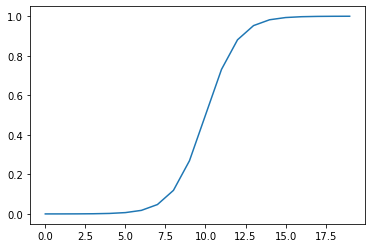

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting all together with a multiclass classification problem

* Binary classification = one thing or another(cat vs. dog, spam vs. not spam etc.)

* Multiclass classification = more then one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

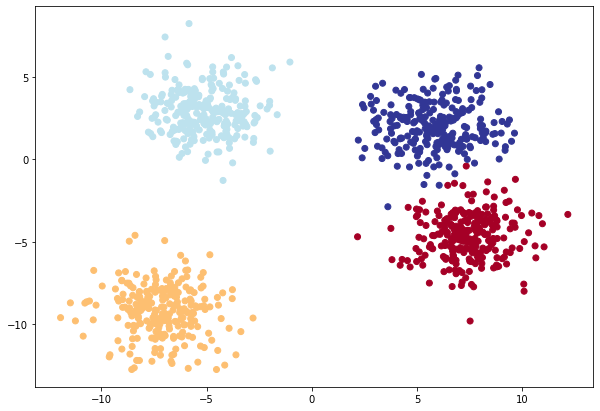

In [ ]:
# Import dependencies
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameter for data creation
NUM_CLASSES = 4
NUM_FEATURE = 2
RANDOM_SEED = 128

# 1. Create a multi-class data
x_blob,y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURE,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

# 2. Turn data into tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
x_blob_train,x_blob_test,y_blob_train,y_blob_test = train_test_split(x_blob,
                                                 y_blob,
                                                 test_size=0.2,
                                                 random_state=RANDOM_SEED)

# 4. Plot data (Visualize)
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],
            x_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-classification model in PyTorch

In [ ]:
# Create  device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Building a multi-class classification model
class BolbModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_unit =8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=output_features)
    )

  def forward(self,x:torch.Tensor):
    return self.linear_layer_stack(x)

# Create a instace of blobModel and send it to the target device
model_4 = BolbModel(input_features=2,
                    output_features=4,
                    hidden_unit=8).to(device)

model_4

BolbModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
x_blob_train.shape,y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 2, 3, 1, 1]))

### 8.3 Create a loss function and an optimizer for multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


In [ ]:
next(model_4.parameters()).device

device(type='cuda', index=0)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model


In [ ]:
# Let's get some raw outputsof our model(logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test.to(device))

y_logits[:10]

tensor([[ 0.2164, -0.2603,  0.1890,  0.0104],
        [ 0.0908, -0.5269, -0.1642, -0.0171],
        [-0.3210, -0.7977, -0.8324, -0.3748],
        [-0.5437, -0.7272, -1.0990, -0.6412],
        [-0.4616, -0.8206, -1.0213, -0.5065],
        [-0.5551, -0.8692, -1.1616, -0.5898],
        [-0.8435, -0.9675, -1.5630, -0.8559],
        [-0.7229, -1.0245, -1.4428, -0.7304],
        [-1.1317, -0.8527, -2.0750, -1.4404],
        [-0.5519, -0.9697, -1.2013, -0.5737]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 2, 0, 0, 0, 0, 0, 0, 3, 0])

In [ ]:
# Convert our model's logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.2164, -0.2603,  0.1890,  0.0104],
        [ 0.0908, -0.5269, -0.1642, -0.0171],
        [-0.3210, -0.7977, -0.8324, -0.3748],
        [-0.5437, -0.7272, -1.0990, -0.6412],
        [-0.4616, -0.8206, -1.0213, -0.5065]], device='cuda:0')
tensor([[0.2935, 0.1822, 0.2855, 0.2388],
        [0.3114, 0.1679, 0.2413, 0.2795],
        [0.3156, 0.1960, 0.1893, 0.2991],
        [0.3018, 0.2512, 0.1732, 0.2738],
        [0.3100, 0.2165, 0.1771, 0.2964]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(0, device='cuda:0')

In [ ]:
# Calculate accuracy - out of 100 examples, what persentage does our model get right?

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Write a training and evaluation loop for model_2
torch.manual_seed(128)
torch.cuda.manual_seed(128)

# Train for longer
epochs = 100

# Put data on the target device
x_blob_train,y_blob_train = x_blob_train.to(device),y_blob_train.to(device)
x_blob_test,y_blob_test = x_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):

  # Training
  model_4.train()

  # 1. Forward pass
  y_logits =model_4(x_blob_train).squeeze()
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)
  
  # 3.Optimizer zero grade
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  #Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. Foeword pass
    test_logits = model_4(x_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_true= y_blob_test,
                           y_pred=test_pred)
    
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc : {test_acc:.2f}")

Epoch: 0 | Loss: 1.44857, Acc: 22.62% | Test loss: 1.34335, Test acc : 19.00
Epoch: 10 | Loss: 0.98954, Acc: 61.50% | Test loss: 0.95490, Test acc : 70.50
Epoch: 20 | Loss: 0.76290, Acc: 74.38% | Test loss: 0.74224, Test acc : 73.50
Epoch: 30 | Loss: 0.66223, Acc: 74.50% | Test loss: 0.64761, Test acc : 73.50
Epoch: 40 | Loss: 0.60548, Acc: 74.50% | Test loss: 0.59308, Test acc : 73.50
Epoch: 50 | Loss: 0.56546, Acc: 74.50% | Test loss: 0.55440, Test acc : 73.50
Epoch: 60 | Loss: 0.53398, Acc: 74.50% | Test loss: 0.52364, Test acc : 73.50
Epoch: 70 | Loss: 0.50744, Acc: 74.88% | Test loss: 0.49731, Test acc : 73.50
Epoch: 80 | Loss: 0.48371, Acc: 98.38% | Test loss: 0.47337, Test acc : 99.00
Epoch: 90 | Loss: 0.46121, Acc: 99.25% | Test loss: 0.45044, Test acc : 99.00


### 8.6 Making and evaluating prediction with a PyTorch multiclass model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)

# View the first 10 prediction
y_logits[:10]

tensor([[-0.5873,  0.8792,  0.6688, -0.7238],
        [-0.5390,  0.7978,  0.9477, -0.5659],
        [ 2.1030, -4.6126, -5.3573, -2.9403],
        [-0.1109, -5.0480, -5.9069, -0.7733],
        [ 1.4308, -5.3116, -6.1590, -2.2530],
        [ 1.3369, -5.8914, -6.8601, -2.1560],
        [ 0.6417, -7.4073, -8.7123, -1.4701],
        [ 2.0945, -7.1700, -8.3658, -2.8701],
        [-4.3847, -7.2270, -8.7070,  3.3621],
        [ 2.7307, -6.2308, -7.2097, -3.4927]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probes = torch.softmax(y_logits,dim=1)
y_pred_probes[:10]

tensor([[1.0290e-01, 4.4596e-01, 3.6137e-01, 8.9770e-02],
        [9.8017e-02, 3.7312e-01, 4.3345e-01, 9.5413e-02],
        [9.9183e-01, 1.2020e-03, 5.7081e-04, 6.3996e-03],
        [6.5538e-01, 4.7025e-03, 1.9920e-03, 3.3793e-01],
        [9.7389e-01, 1.1490e-03, 4.9236e-04, 2.4472e-02],
        [9.6954e-01, 7.0369e-04, 2.6708e-04, 2.9486e-02],
        [8.9172e-01, 2.8484e-04, 7.7243e-05, 1.0792e-01],
        [9.9295e-01, 9.4063e-05, 2.8450e-05, 6.9318e-03],
        [4.3196e-04, 2.5177e-05, 5.7318e-06, 9.9954e-01],
        [9.9785e-01, 1.2798e-04, 4.8084e-05, 1.9782e-03]], device='cuda:0')

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probes,dim=1)
y_preds[:10]

tensor([1, 2, 0, 0, 0, 0, 0, 0, 3, 0], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 2, 0, 0, 0, 0, 0, 0, 3, 0], device='cuda:0')

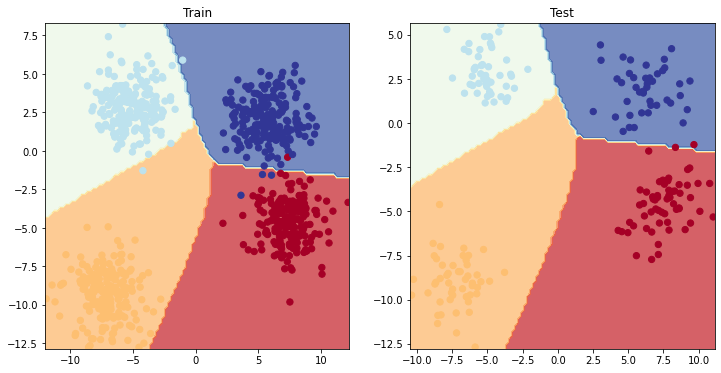

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,x_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,x_blob_test,y_blob_test)

## 9. A few more classification metrics...(to evalute our classification model)


* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchmetrics

#Setup metrics
torchmetric_accuracy = torchmetrics.Accuracy(task="multiclass",num_classes=NUM_CLASSES).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9900, device='cuda:0')